In [1]:
import numpy as np
from csc.utils import *
from csc.atoms import *
from csc.workbench import *
from csc.dictionary import *
from itertools import product
import matplotlib.pyplot as plt

# Atom parameters
bmin = 0.005
bmax = 0.06
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.010
ymax = 0.036
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 143 different atoms


### Workbench initialization with a database path

In [2]:
batchSize = 200

pomme = False

if pomme :
    constrained_signals_db = f'/home/gomes/synthetic-data/constrained-signals-{batchSize}.json'

    borelli_mmp81_db = f'/home/gomes/synthetic-data/borelli-mmpdf81-{batchSize}.json'
    borelli_mmp27_db = f'/home/gomes/synthetic-data/borelli-mmpdf27-{batchSize}.json'
    borelli_mmp9_db = f'/home/gomes/synthetic-data/borelli-mmpdf9-{batchSize}.json'
    borelli_mmp3_db = f'/home/gomes/synthetic-data/borelli-mmpdf3-{batchSize}.json'

    icassp_mp_db = f'/home/gomes/synthetic-data/icassp-mp-{batchSize}.json'
    icassp_omp_db = f'/home/gomes/synthetic-data/icassp-omp-{batchSize}.json'
    icassp_alphaCSC_db = f'/home/gomes/synthetic-data/icassp-alphaCSC-{batchSize}.json'

else:
    constrained_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\constrained-signals-{batchSize}.json'

    borelli_mmp81_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\borelli-mmpdf81-{batchSize}.json'
    borelli_mmp27_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\borelli-mmpdf27-{batchSize}.json'
    borelli_mmp9_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\borelli-mmpdf9-{batchSize}.json'
    borelli_mmp3_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\borelli-mmpdf3-{batchSize}.json'
    
    icassp_mp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\icassp-mp-{batchSize}.json'
    icassp_omp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\icassp-omp-{batchSize}.json'
    icassp_alphaCSC_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\synthetic-data\\icassp-alphaCSC-{batchSize}.json'

In [3]:
workbench = CSCWorkbench(constrained_signals_db)
workbench.set_dictionary(dictionary)
workbench.load_data()

## Top 10 of signals where OMP fails

In [4]:

metrics_per_mse_diff = workbench.sparVar_sortByBestMSEDiff(borelli_mmp27_db, icassp_omp_db, ascending=False)
print(Counter([snr for snr in metrics_per_mse_diff['snr']]))

Counter({10: 800, 15: 800, 5: 800, 0: 800})


In [5]:
metrics_per_mse_diff = metrics_per_mse_diff.loc[metrics_per_mse_diff['snr'] == 10]
print(metrics_per_mse_diff.head(20))
ids = [id for id in metrics_per_mse_diff.head(20)['id']]
print(ids)

        id  snr  sparsity   omp-mse       mmp-mse  mse-diff
1846  1846   10         3  0.000390  6.588695e-07  0.998310
1847  1847   10         3  0.000273  4.671841e-07  0.998290
1601  1601   10         2  0.000231  5.167395e-07  0.997763
1712  1712   10         2  0.000006  3.864631e-08  0.993964
1749  1749   10         2  0.000064  7.521958e-07  0.988275
2066  2066   10         4  0.000562  8.398893e-06  0.985047
1622  1622   10         2  0.000050  1.215842e-06  0.975530
1764  1764   10         2  0.000012  3.664749e-07  0.968501
1968  1968   10         3  0.000693  2.400318e-05  0.965365
1776  1776   10         2  0.000049  1.955814e-06  0.960202
1735  1735   10         2  0.000440  1.817205e-05  0.958742
1700  1700   10         2  0.000374  1.838593e-05  0.950902
1723  1723   10         2  0.000006  3.741722e-07  0.935635
1987  1987   10         3  0.000607  4.058430e-05  0.933179
1699  1699   10         2  0.000005  3.746047e-07  0.926753
1656  1656   10         2  0.000036  2.7

        id  snr  sparsity   omp-mse       mmp-mse  mse-diff
1846  1846   10         3  0.000390  6.588695e-07  0.998310
1847  1847   10         3  0.000273  4.671841e-07  0.998290
1601  1601   10         2  0.000231  5.167395e-07  0.997763
1712  1712   10         2  0.000006  3.864631e-08  0.993964
1749  1749   10         2  0.000064  7.521958e-07  0.988275
2066  2066   10         4  0.000562  8.398893e-06  0.985047
1622  1622   10         2  0.000050  1.215842e-06  0.975530
1764  1764   10         2  0.000012  3.664749e-07  0.968501
1968  1968   10         3  0.000693  2.400318e-05  0.965365
1776  1776   10         2  0.000049  1.955814e-06  0.960202
1735  1735   10         2  0.000440  1.817205e-05  0.958742
1700  1700   10         2  0.000374  1.838593e-05  0.950902
1723  1723   10         2  0.000006  3.741722e-07  0.935635
1987  1987   10         3  0.000607  4.058430e-05  0.933179
1699  1699   10         2  0.000005  3.746047e-07  0.926753
1656  1656   10         2  0.000036  2.708260e-06  0.923982
1602  1602   10         2  0.000957  9.759250e-05  0.897976
1962  1962   10         3  0.000288  2.941846e-05  0.897699
1696  1696   10         2  0.000272  2.922288e-05  0.892545
1702  1702   10         2  0.000020  2.210975e-06  0.891281
[1846, 1847, 1601, 1712, 1749, 2066, 1622, 1764, 1968, 1776, 1735, 1700, 1723, 1987, 1699, 1656, 1602, 1962, 1696, 1702]

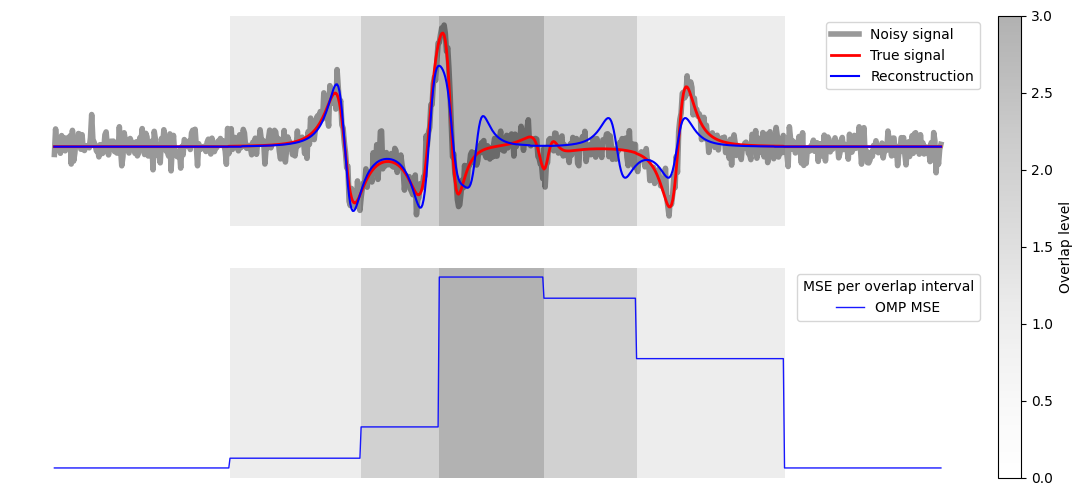

In [10]:
workbench.plotOrthogonalSignalErrorPerOverlapFromId(db_path=icassp_omp_db, db_key='omp', id=ids[13], cmap='Greys')

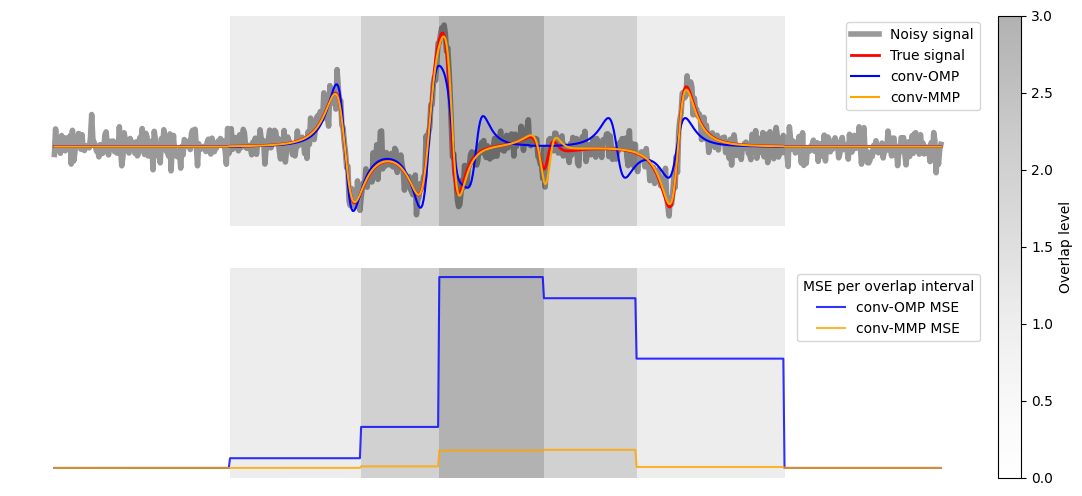

In [11]:
workbench.plot_MMP_OMP_comparisonPerOverlapFromId(mmp_db_path=borelli_mmp3_db, omp_db_path=icassp_omp_db, id=ids[13], cmap='Greys')

In [15]:
print(ids[13])

1987
